# Step 1 - Load the data set

* After loading the dataset, we select the 3rd and 4th columns which will be our X1, X2 attributes respectively and the 9th column which provides the output-response y. 

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import pandas as pd
import numpy as np
results = []
with open('DataSet2.txt') as inputfile:
    for line in inputfile:
        results.append(line.strip().split(';'))
    print(results[0:10])

data = pd.DataFrame(results, columns = list("abcdefghi"))
data = data.drop(['a', 'b'], 1)
data = data.drop(data.index[0])
data = data[['c', 'd', 'i']]
data = data[(data[['c','d','i']] != '?').all(axis=1)]
data


Saving DataSet2.txt to DataSet2.txt
User uploaded file "DataSet2.txt" with length 132960755 bytes
[['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], ['16/12/2006', '17:24:00', '4.216', '0.418', '234.840', '18.400', '0.000', '1.000', '17.000'], ['16/12/2006', '17:25:00', '5.360', '0.436', '233.630', '23.000', '0.000', '1.000', '16.000'], ['16/12/2006', '17:26:00', '5.374', '0.498', '233.290', '23.000', '0.000', '2.000', '17.000'], ['16/12/2006', '17:27:00', '5.388', '0.502', '233.740', '23.000', '0.000', '1.000', '17.000'], ['16/12/2006', '17:28:00', '3.666', '0.528', '235.680', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:29:00', '3.520', '0.522', '235.020', '15.000', '0.000', '2.000', '17.000'], ['16/12/2006', '17:30:00', '3.702', '0.520', '235.090', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:31:00', '3.700', '0.520', '235.220', '15.800', '0.000', '1.000', '

,c,d,i
1,4.216,0.418,17.000
2,5.360,0.436,16.000
3,5.374,0.498,17.000
4,5.388,0.502,17.000
5,3.666,0.528,17.000
6,3.520,0.522,17.000
7,3.702,0.520,17.000
8,3.700,0.520,17.000
9,3.668,0.510,17.000
10,3.662,0.510,16.000


#  Some preprocessing

* Here, we assign float values to our dataframe's content and find the minimum and maximum values of each one of the **X1** and **X2** attributes.

In [2]:
L_float = data.as_matrix(columns=None)
#Convert all values to float.
data3D = L_float.astype(np.float)
print(data3D.shape)

#Find min, max values for both attributes.
lim1=data3D[:,0].min()
print(lim1)

lim2=data3D[:,0].max()
print(lim2)

print()

lim3=data3D[:,1].min()
print(lim3)

lim4=data3D[:,1].max()
print(lim4)

(2049280, 3)
0.076
11.122
()
0.0
1.39





* Next, we generate our new query data set, where the query's attributes **X1** and **X2** are randomly chosen from a **Normal distribution**, where  *X1 ~ N(mu1, sigma1^2)* and X2~N(mu2, sigma2^2).  The radius **z** is a relatively small, fixed value.





In [3]:
import random
import numpy as np

#Generate X1,X2 using random normal distribution and a fixed z.
mu1, sigma1 = 0, (lim2 - lim1)/2 # mean and standard deviation
X1 = np.abs(np.random.normal(mu1, sigma1, 200))
mu2, sigma2 = 0, (lim4 - lim3)/2 # mean and standard deviation
X2 = np.abs(np.random.normal(mu2, sigma2, 200))
z1 = 0.05*(lim2 - lim1)
z2 = 0.05*(lim4 - lim3)
z = np.sqrt(z1**2 + z2**2)

print(X1)
print()
print(X2)
print()
print(z)

[ 3.39000173  3.47629281 10.54209735 10.08169315  3.28900259  0.84212527
 12.93296262  5.08201573  3.38276383  2.57499558  0.55825806  4.11998671
  3.97693239  7.66267242  0.79724295  2.88360126  6.66989555  1.93725813
  7.57577651 10.2548331   5.79894208  0.39028245  0.34964942  2.58259184
  2.19778451  2.73472941  4.08021086  2.37290017  5.73212053  2.61722924
  5.61654243  4.4446157   0.24292265  0.74930191  3.82362365  1.92818232
  0.34248039  1.96735147  2.50935143  0.65120587  7.47799678  6.59239931
  6.69065809  5.2586293   3.45455748  0.5495838   3.07916285  0.48288871
  2.51960708  5.60372242  1.93505477  4.46068084  0.97679907  4.07442284
  8.38359774  2.55911138  1.83064595 13.11042793  2.31400905  4.69403008
  6.49278194  2.3092482   8.50609294  1.00754506  0.92578093  2.85500939
  2.18443811  6.24155481  4.7007624   3.52486268  2.46842956  4.34953079
  2.60883351  7.00316473 10.3822691   6.50734227  9.56499776  3.51484179
  1.51489816  4.01642479  0.62710834  0.49093832  2

* We **merge** the lists of X1, X2 and z into one array.

In [4]:
X1_flattened = (X1.T).ravel()
X2_flattened = (X2.T).ravel()
QA_dataset = np.empty((len(X1),4))
QA_dataset[:,0] = X1_flattened
QA_dataset[:,1] = X2_flattened
QA_dataset[:,2] = z
QA_dataset[:,3] = 0
print(QA_dataset)


[[3.39000173e+00 2.58321392e-01 5.56655675e-01 0.00000000e+00]
 [3.47629281e+00 3.36756888e-02 5.56655675e-01 0.00000000e+00]
 [1.05420973e+01 1.68167068e-01 5.56655675e-01 0.00000000e+00]
 [1.00816931e+01 5.09564988e-01 5.56655675e-01 0.00000000e+00]
 [3.28900259e+00 1.77468921e-01 5.56655675e-01 0.00000000e+00]
 [8.42125271e-01 1.75069760e-01 5.56655675e-01 0.00000000e+00]
 [1.29329626e+01 6.60855196e-01 5.56655675e-01 0.00000000e+00]
 [5.08201573e+00 9.36115250e-02 5.56655675e-01 0.00000000e+00]
 [3.38276383e+00 1.23090539e+00 5.56655675e-01 0.00000000e+00]
 [2.57499558e+00 4.96843438e-01 5.56655675e-01 0.00000000e+00]
 [5.58258063e-01 2.47010964e-01 5.56655675e-01 0.00000000e+00]
 [4.11998671e+00 5.11579472e-01 5.56655675e-01 0.00000000e+00]
 [3.97693239e+00 1.03575588e+00 5.56655675e-01 0.00000000e+00]
 [7.66267242e+00 7.46060377e-01 5.56655675e-01 0.00000000e+00]
 [7.97242953e-01 6.63047969e-01 5.56655675e-01 0.00000000e+00]
 [2.88360126e+00 3.96582655e-01 5.56655675e-01 0.000000

# Step 2 - Training the Model

* Here we calculate the true answers of QA_dataset array, based on the downloaded dataset data3D.
For this purpose, we use the *calculate_y()* function.

In [5]:
def calculate_y(query_data, data):
  average_y = []   
  #We populate the list
  for validation_datapoint in query_data:
    y, y_final = [], []
    iter=0
    for query_datapoint in data:
      #Check if the incoming datapoint satisfies the condition, according to which it's distance from the validation datapoint is smaller or equal,
      #to the radius z of the circle with center C(X1,X2), where validation_datapoint q=[X1,X2,z].
      if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**2):
        y.append(query_datapoint[2])
        iter+=1
    #If there is no data point assigned to our query, increase (double) the radius. 
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]):
          y.append(query_datapoint[2])
          iter+=1  
    #If, still there is no data point assigned to our query, increase (double) the radius.
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**(1/2)):
          y.append(query_datapoint[2])
          iter+=1
    y_final = np.asarray(y)  
    #Calculate the average value of y.
    average_y.append(np.mean(y_final, axis=0))  
  return(average_y)    
            
        
      
#Run the algorithm.      
x_list = calculate_y(QA_dataset, data3D[0:2000000])
#print(x_list)
#In case there is a query that did not match to any datapoint from data3D, to avoid error in calculations due to NaN, we set 0 value.
x_array = np.asarray(x_list)
replace = np.isnan(x_array)
x_array[replace] = 0
#We store y in the list, real_y.
real_y = x_array
print(real_y)


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[14.31456467 14.48527179 14.55555556 15.26086957 14.16816749  3.58973346
  0.         14.46241524 15.18614719 13.24777355  0.66040723 14.83458389
 14.42720437 16.09756098  2.32870848 13.13631717 15.36958711 14.98331759
 16.12062257 16.         17.5         0.54474383  0.43984134 13.25343171
 13.90678539 14.00744048 14.88565345  6.5        15.38201487 14.5486461
 15.27294486 14.56419239  0.42468786  1.49008562 14.7847528   9.85849057
  0.44534041 14.59455763 13.55545497  0.96815519 15.96816976 15.40747077
 15.46368715 18.         14.41553162  0.62360978 13.56685755  0.62410796
 13.55457814 15.29197292 14.78784263 15.28014184  8.51228263 14.90662123
 16.5260274  14.16060716 15.09813562  0.         13.64642052 14.50938361
 15.49575726 14.1206913  15.09090909  9.31431634  0.52941176 13.06951649
 14.26884321 14.75899844 14.47901056 14.46711048 13.7178896  14.70117955
 14.96428571 15.61755802 16.         17.         16.25       13.4639329
 14.4943747  14.92064564  0.70263554  0.62917433 14.3

* We **merge** the true answers **y** with the **X1**, **X2** and **z** attributes of the QA_dataset, into a new matrix of 4 columns with attributes X1, X2, z, y in incremental order.

In [6]:
QA_dataset[:,3] = real_y
print(QA_dataset)


[[3.39000173e+00 2.58321392e-01 5.56655675e-01 1.43145647e+01]
 [3.47629281e+00 3.36756888e-02 5.56655675e-01 1.44852718e+01]
 [1.05420973e+01 1.68167068e-01 5.56655675e-01 1.45555556e+01]
 [1.00816931e+01 5.09564988e-01 5.56655675e-01 1.52608696e+01]
 [3.28900259e+00 1.77468921e-01 5.56655675e-01 1.41681675e+01]
 [8.42125271e-01 1.75069760e-01 5.56655675e-01 3.58973346e+00]
 [1.29329626e+01 6.60855196e-01 5.56655675e-01 0.00000000e+00]
 [5.08201573e+00 9.36115250e-02 5.56655675e-01 1.44624152e+01]
 [3.38276383e+00 1.23090539e+00 5.56655675e-01 1.51861472e+01]
 [2.57499558e+00 4.96843438e-01 5.56655675e-01 1.32477736e+01]
 [5.58258063e-01 2.47010964e-01 5.56655675e-01 6.60407234e-01]
 [4.11998671e+00 5.11579472e-01 5.56655675e-01 1.48345839e+01]
 [3.97693239e+00 1.03575588e+00 5.56655675e-01 1.44272044e+01]
 [7.66267242e+00 7.46060377e-01 5.56655675e-01 1.60975610e+01]
 [7.97242953e-01 6.63047969e-01 5.56655675e-01 2.32870848e+00]
 [2.88360126e+00 3.96582655e-01 5.56655675e-01 1.313631

* Here we apply **Principal Component Analysis** on QA_dataset and use the **RPCL** algorithm to cluster the new query-answer data set of 2 dimensions.

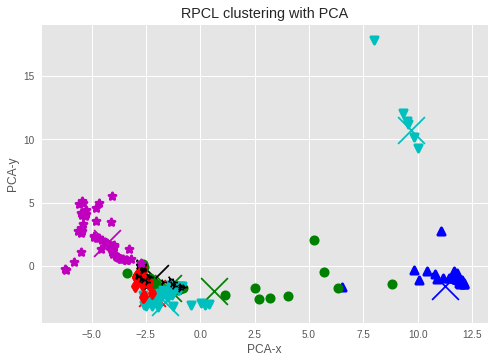

('\t\t', 'Cluster 1 has: 18 data points')
('\t\t', 'Cluster 2 has: 33 data points')
('\t\t', 'Cluster 3 has: 20 data points')
('\t\t', 'Cluster 4 has: 31 data points')
('\t\t', 'Cluster 5 has: 28 data points')
('\t\t', 'Cluster 6 has: 55 data points')
('\t\t', 'Cluster 7 has: 9 data points')
('\t\t', 'Cluster 8 has: 6 data points')


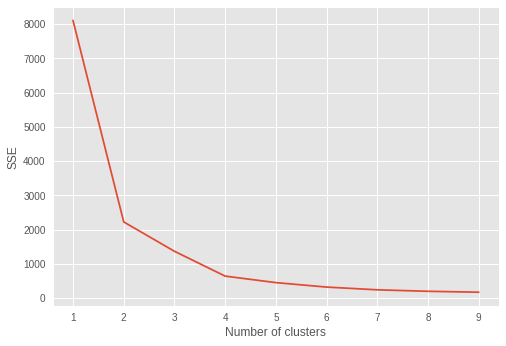

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(QA_dataset)
#print(sklearn_pca_x)


markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=8):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>=10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>99):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#We call the fit() fucntion.
clf = K_Means()
clf.fit(sklearn_pca_x)

fig = plt.figure()

#Plot the centroids. 
for centroid in clf.centroids:
    color = colors[centroid]
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color=color, s=720, linewidths=5)

#Plot the datapoints. Their color/shape depends on their classification.
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=marker, color=color, s=50, linewidths=3)

        
plt.title('RPCL clustering with PCA')
plt.xlabel('PCA-x')
plt.ylabel('PCA-y')         
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=7, number=len(clf.classifications[6])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=8, number=len(clf.classifications[7])))

#Here we plot the Sum of distances of each cluster's datapoints from their respective centroid.
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(sklearn_pca_x)
    labels1 = kmeans.labels_
    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center.
    
#The plot showcases the error with respect to the number of clusters for K-Means algorithm.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("")
plt.show()

* We also apply **t-SNE** on QA_dataset and use the **RPCL** algorithm to cluster the new query-answer data set of 2 dimensions.

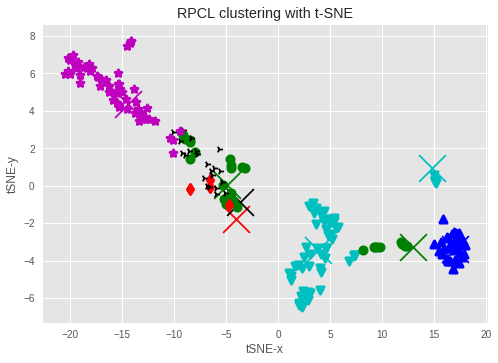

('\t\t', 'Cluster 1 has: 18 data points')
('\t\t', 'Cluster 2 has: 52 data points')
('\t\t', 'Cluster 3 has: 4 data points')
('\t\t', 'Cluster 4 has: 31 data points')
('\t\t', 'Cluster 5 has: 22 data points')
('\t\t', 'Cluster 6 has: 58 data points')
('\t\t', 'Cluster 7 has: 9 data points')
('\t\t', 'Cluster 8 has: 6 data points')


In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(QA_dataset)

markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=8):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>=10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>99):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#We call the fit() fucntion.
clf = K_Means()
clf.fit(x_test_2d)

fig = plt.figure()

#Plot the centroids. 
for centroid in clf.centroids:
    color = colors[centroid]
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color=color, s=720, linewidths=5)

#Plot the datapoints. Their color/shape depends on their classification.
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=marker, color=color, s=50, linewidths=3)

        
plt.title('RPCL clustering with t-SNE')
plt.xlabel('tSNE-x')
plt.ylabel('tSNE-y')         
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=7, number=len(clf.classifications[6])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=8, number=len(clf.classifications[7])))


# Step 3 - Predicting the Answer

* First, we generate a small set of **100 queries** with 3 attributes: X1, X2 and z using the **Normal distribution**.

In [62]:
import random
import numpy as np

#Generate 20 queries q=[X1,X2,z] with X1,X2 following the Normal distribution and z fixed.
mu1, sigma1 = 0, (lim2 - lim1)/2 # mean and standard deviation
X1 = np.abs(np.random.normal(mu1, sigma1, 20))
mu2, sigma2 = 0, (lim4 - lim3)/2 # mean and standard deviation
X2 = np.abs(np.random.normal(mu2, sigma2, 20))
z1 = 0.05*(lim2 - lim1)
z2 = 0.05*(lim4 - lim3)
z = np.sqrt(z1**2 + z2**2)


X1_flattened = (X1.T).ravel()
X2_flattened = (X2.T).ravel()
query = np.empty((len(X1),3))
query[:,0] = X1_flattened
query[:,1] = X2_flattened
query[:,2] = z


print(query)

[[5.00983467e+00 1.56680631e-01 5.56655675e-01]
 [2.13634936e+00 6.37050398e-01 5.56655675e-01]
 [3.02371349e+00 1.24520099e+00 5.56655675e-01]
 [2.93539203e+00 6.34982037e-01 5.56655675e-01]
 [7.77372278e-01 8.93728796e-01 5.56655675e-01]
 [7.00056514e+00 7.25836030e-03 5.56655675e-01]
 [1.96418993e+00 2.51352407e-01 5.56655675e-01]
 [5.22552125e+00 3.10542615e-01 5.56655675e-01]
 [7.66779715e+00 1.38798388e+00 5.56655675e-01]
 [4.53104850e-01 3.26634208e-02 5.56655675e-01]
 [1.94367811e+00 2.17602579e-01 5.56655675e-01]
 [9.37818608e-03 3.22857550e-01 5.56655675e-01]
 [1.47465290e+00 3.34348602e-01 5.56655675e-01]
 [1.25486063e+00 7.49175799e-01 5.56655675e-01]
 [7.66891714e-01 8.70071748e-01 5.56655675e-01]
 [6.79478027e-01 4.81008182e-01 5.56655675e-01]
 [1.08318704e+01 2.39381482e-01 5.56655675e-01]
 [3.15747108e+00 1.44377931e-01 5.56655675e-01]
 [9.03469610e+00 7.83808288e-02 5.56655675e-01]
 [2.22405197e+00 3.35823601e-01 5.56655675e-01]]


* Same as in the Training phase of our model, here we **calculate** the true answers to our 100 new queries, based on the QA_dataset which we generated based on the downloaded data set.
For this purpose, we use the *calculate_y()* function.

In [63]:
def calculate_y_new(query_data, data):
  average_y = []   
  #We populate the list
  for validation_datapoint in query_data:
    y, y_final = [], []
    iter=0
    for query_datapoint in data:
      #Check if the incoming datapoint satisfies the condition, according to which it's distance from the validation datapoint is smaller or equal,
      #to the radius z of the circle with center C(X1,X2), where validation_datapoint q=[X1,X2,z].
      if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**2):
        y.append(query_datapoint[3])
        iter+=1
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]):
          y.append(query_datapoint[3])
          iter+=1  
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**(1/2)):
          y.append(query_datapoint[3])
          iter+=1
    y_final = np.asarray(y)  
    #Calculate the average value of y.
    average_y.append(np.mean(y_final, axis=0))  
  return(average_y)    
            
        
      
      
#Run the algorithm.      
x_list = calculate_y_new(query, QA_dataset)
#print(x_list)
#In case there is a query that did not match to any datapoint from QA_dataset, to avoid error in calculations due to NaN, we set 0 value.
x_array = np.asarray(x_list)
replace = np.isnan(x_array)
x_array[replace] = 0
#We store y in the list, real_y.
real_y = x_array
print(real_y)

[14.58043458 13.82818789 14.23329887 13.64394935  3.13844447 15.59358259
 14.35593639 14.80139249 16.09756098  0.88470136 14.40930182  0.51959536
 13.02342312  9.66995181  2.89486358  3.265133   14.55555556 13.76868101
 16.31937237 13.98118496]


* For the final part of the prediction phase, we use the *fit()* function to cluster the QA_dataset and we **predict** the answer-response for each query from the 100 queries, which we generated for evaluation, by classifying them to the clusters they belong to and assigning the cluster's centroid response, to the query's predicted response.


In [64]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a given list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=5):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>=10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                 
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
    
clf = K_Means()
clf.fit(QA_dataset)

#In pred_y list we store all the predicted answers y for every query, generated for validation.
pred_y = []
for query_data in query:
  print('Query: {number}'.format(number=query_data))
  #We calculate the Euclidean distance of the query's attributes (X1,X2) from the centroid's attributes (X1,X2). 
  #We do not know the query's answer, so we cannot include the y response value in the Eeclidean distance calculation.
  distances = [np.linalg.norm(query_data[0:1] - clf.centroids[centroid][0:1]) for centroid in clf.centroids]
  prediction = distances.index(min(distances))
  print('Predicted Cluster: {number}'.format(number=prediction))
  s = np.asarray(clf.classifications[prediction])
  predicted_y = np.average(s, axis=0)[3]
  pred_y.append(predicted_y)
  print('---------------------------')
print('List of all the predicted answers y: {number}'.format(number=pred_y))




Query: [5.00983467 0.15668063 0.55665567]
Predicted Cluster: 0
---------------------------
Query: [2.13634936 0.6370504  0.55665567]
Predicted Cluster: 1
---------------------------
Query: [3.02371349 1.24520099 0.55665567]
Predicted Cluster: 3
---------------------------
Query: [2.93539203 0.63498204 0.55665567]
Predicted Cluster: 3
---------------------------
Query: [0.77737228 0.8937288  0.55665567]
Predicted Cluster: 1
---------------------------
Query: [7.00056514 0.00725836 0.55665567]
Predicted Cluster: 4
---------------------------
Query: [1.96418993 0.25135241 0.55665567]
Predicted Cluster: 1
---------------------------
Query: [5.22552125 0.31054261 0.55665567]
Predicted Cluster: 0
---------------------------
Query: [7.66779715 1.38798388 0.55665567]
Predicted Cluster: 4
---------------------------
Query: [0.45310485 0.03266342 0.55665567]
Predicted Cluster: 1
---------------------------
Query: [1.94367811 0.21760258 0.55665567]
Predicted Cluster: 1
---------------------------

# Step 4 - Evaluating the results

* Here, we calulate the **Average Means Squared Error** between the true answer y and the predicted answer y' for our generated queries.

In [65]:
error = np.sum((pred_y - real_y)**2)
average_means_squared_error = np.sqrt(error)/(len(real_y))
print('RMSE = {number}'.format(number=average_means_squared_error))

RMSE = 1.68378472925


* The **Normalised Average Means Squared Error** (NRMSE) between the true answer y and the predicted answer y' for our generated queries is calculated below.

In [66]:
average_y = np.average(real_y, axis=0)

enumerator = (pred_y - real_y)**2
denominator = (real_y - average_y)**2
normalised_average_means_squared_error = np.sum(np.sqrt(enumerator / denominator)) / len(real_y)

print('NRMSE = {number}'.format(number=normalised_average_means_squared_error))

NRMSE = 1.2305326273


In [67]:
error = np.sum(np.abs(pred_y - real_y))
mean_absolute_error = error/(len(real_y))
print('MAE = {number}'.format(number=mean_absolute_error))

MAE = 5.18027591398


* We calculate the **Average Means Squared Error** (RMSE) for different k values, for* k=3,4,...,16* and plot the graph.

For K = 3 the Predictive Error is 1.32303138183
For K = 4 the Predictive Error is 0.795860669774
For K = 5 the Predictive Error is 0.796146100568
For K = 6 the Predictive Error is 0.796309507911
For K = 7 the Predictive Error is 0.473776500602
For K = 8 the Predictive Error is 1.18815493661
For K = 9 the Predictive Error is 1.18815493661
For K = 10 the Predictive Error is 1.18710549828
For K = 11 the Predictive Error is 1.18710549828
For K = 12 the Predictive Error is 1.18720927517
For K = 13 the Predictive Error is 1.18720927517
For K = 14 the Predictive Error is 1.18720927517
For K = 15 the Predictive Error is 1.18720927517


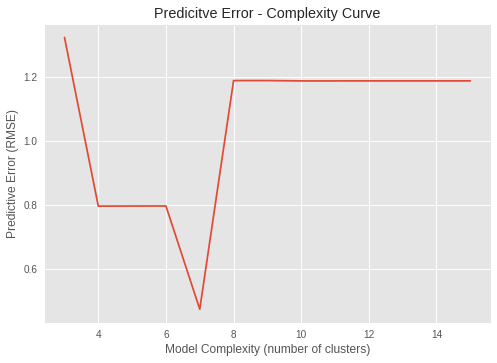

In [68]:
#We change the RPCL algorithm, to iterate over various k values.
def fit(k,data):
        #Create empty dictionary
        centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(k):
            centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        classifications= {}
            
        #Create a list
        for i in range(k):
            classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - centroids[centroid]) for centroid in centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            centroids[classification] = centroids[classification] + 0.1 * (featureset - centroids[classification])
            centroids[second_winner_centroid] = centroids[second_winner_centroid] - 0.025 * (featureset - centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints, then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in classifications:
                if (len(classifications[classification])>19):
                  centroids[classification] = np.average(classifications[classification], axis=0)
            return centroids
          
complexity = list()    
temp = list()       
for k in range(3,16):
  clf = fit(k, QA_dataset)
  pred_y = []
  for query_data in query:
    #We calculate the Euclidean distance of the query's attributes (X1,X2) from the centroid's attributes (X1,X2). 
    #We do not know the query's answer, so we cannot include the y response value in the Eeclidean distance calculation.
    distances = [np.linalg.norm(query_data[0:1] - clf[centroid][0:1]) for centroid in clf]
    prediction = distances.index(min(distances))
    s = clf[prediction]
    predicted_y = s[3]
    pred_y.append(predicted_y)
    
  error = np.sum((pred_y - real_y)**2)
  average_means_squared_error = np.sqrt(error)/(len(real_y))
  temp.append(average_means_squared_error)
  complexity.append(k)
  print('For K = {clusters} the Predictive Error is {number}'.format(clusters=k, number=average_means_squared_error))

plt.figure()
plt.plot(complexity, temp)
plt.xlabel("Model Complexity (number of clusters)")
plt.ylabel("Predictive Error (RMSE)")
plt.title("Predicitve Error - Complexity Curve")
plt.show()